In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')

In [2]:
colnames = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","outcome"]

df = pd.read_csv('dataset/adult.csv', names=colnames, header=None)
df_test = pd.read_csv('dataset/adult_test.csv', names=colnames, header=None)


df.append(df_test, ignore_index=True)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,outcome
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


# Preprocessing Data

In [3]:
print('How many NaN values by attribute:')
print(df.isnull().sum())
print('How many 0 values by attribute:')
print((df==0).sum())

How many NaN values by attribute:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
outcome           0
dtype: int64
How many 0 values by attribute:
age                   0
workclass             0
fnlwgt                0
education             0
education-num         0
marital-status        0
occupation            0
relationship          0
race                  0
sex                   0
capital-gain      29849
capital-loss      31042
hours-per-week        0
native-country        0
outcome               0
dtype: int64


In [4]:
df['occupation'].replace(to_replace=' ?', value="Unknown", inplace=True)
df['workclass'].replace(to_replace=' ?', value="Unknown", inplace=True)
df['native-country'].replace(to_replace=' ?', value="Unknown", inplace=True)

The features 'capital-gain' and 'capital-loss' have several values equal to 0 but I decided to keep them with the original values. I also decided to keep the ' ?' as an 'Unknown' class.

## Transforming string values into numbers

In [5]:
laben = pp.LabelEncoder()

laben.fit(df['race'])
df['race'] = laben.transform(df['race'])
print('race\n', laben.classes_)

laben.fit(df['sex'])
df['sex'] = laben.transform(df['sex'])
print('\nsex\n', laben.classes_)

laben.fit(df['relationship'])
df['relationship'] = laben.transform(df['relationship'])
print('\nrelationship\n', laben.classes_)

laben.fit(df['occupation'])
df['occupation'] = laben.transform(df['occupation'])
print('\noccupation\n', laben.classes_)

laben.fit(df['workclass'])
df['workclass'] = laben.transform(df['workclass'])
print('\nworkclass\n', laben.classes_)

laben.fit(df['education'])
df['education'] = laben.transform(df['education'])
print('\neducation\n', laben.classes_)

laben.fit(df['marital-status'])
df['marital-status'] = laben.transform(df['marital-status'])
print('\nmarital-status\n', laben.classes_)

laben.fit(df['native-country'])
df['native-country'] = laben.transform(df['native-country'])
print('\nnative-country\n', laben.classes_)

laben.fit(df['outcome'])
df['outcome'] = laben.transform(df['outcome'])
print('\noutcome\n', laben.classes_)

race
 [' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']

sex
 [' Female' ' Male']

relationship
 [' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']

occupation
 [' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving' 'Unknown']

workclass
 [' Federal-gov' ' Local-gov' ' Never-worked' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay' 'Unknown']

education
 [' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']

marital-status
 [' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']

native-country
 [' Cambodia' ' Canada'

In [6]:
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,outcome
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
5,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
6,49,3,160187,6,5,3,7,1,2,0,0,0,16,22,0
7,52,5,209642,11,9,2,3,0,4,1,0,0,45,38,1
8,31,3,45781,12,14,4,9,1,4,0,14084,0,50,38,1
9,42,3,159449,9,13,2,3,0,4,1,5178,0,40,38,1


# Some plots

In [7]:
color = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

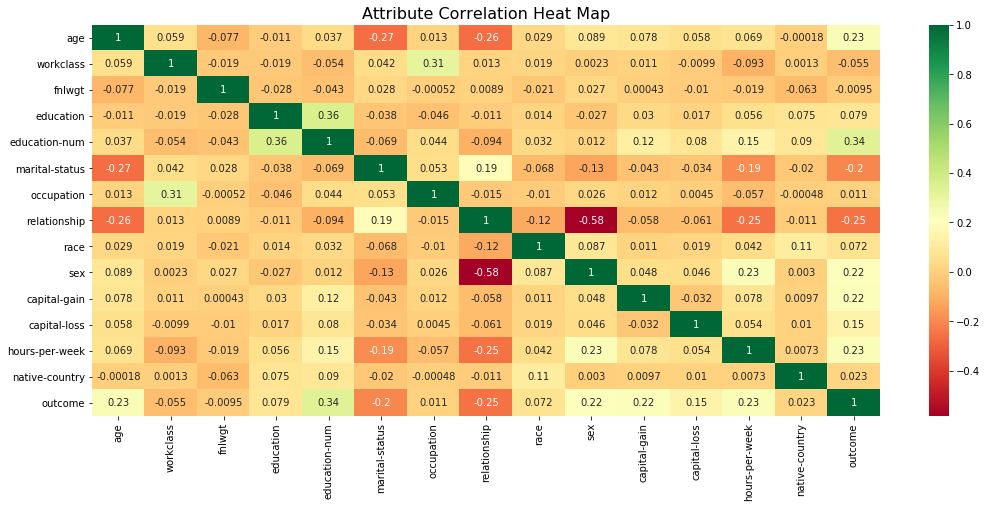

In [8]:
plt.figure(figsize = (15,7))
value = randint(0,len(color)-4)

df.corr()
sns.heatmap(df.corr(),annot=True,cmap=color[value])
plt.title("Attribute Correlation Heat Map",fontsize = 16)
plt.tight_layout(pad=0.5)
plt.show()

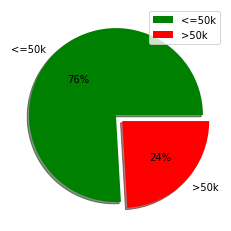

In [9]:
out_data=pd.DataFrame(df.groupby('outcome')['outcome'].count())
colors = ['green','red']
plt.pie(out_data['outcome'],labels=['<=50k','>50k'],autopct='%.0f%%',colors=colors,radius=1,explode = (0, 0.1),shadow=True)
plt.legend()
plt.show()

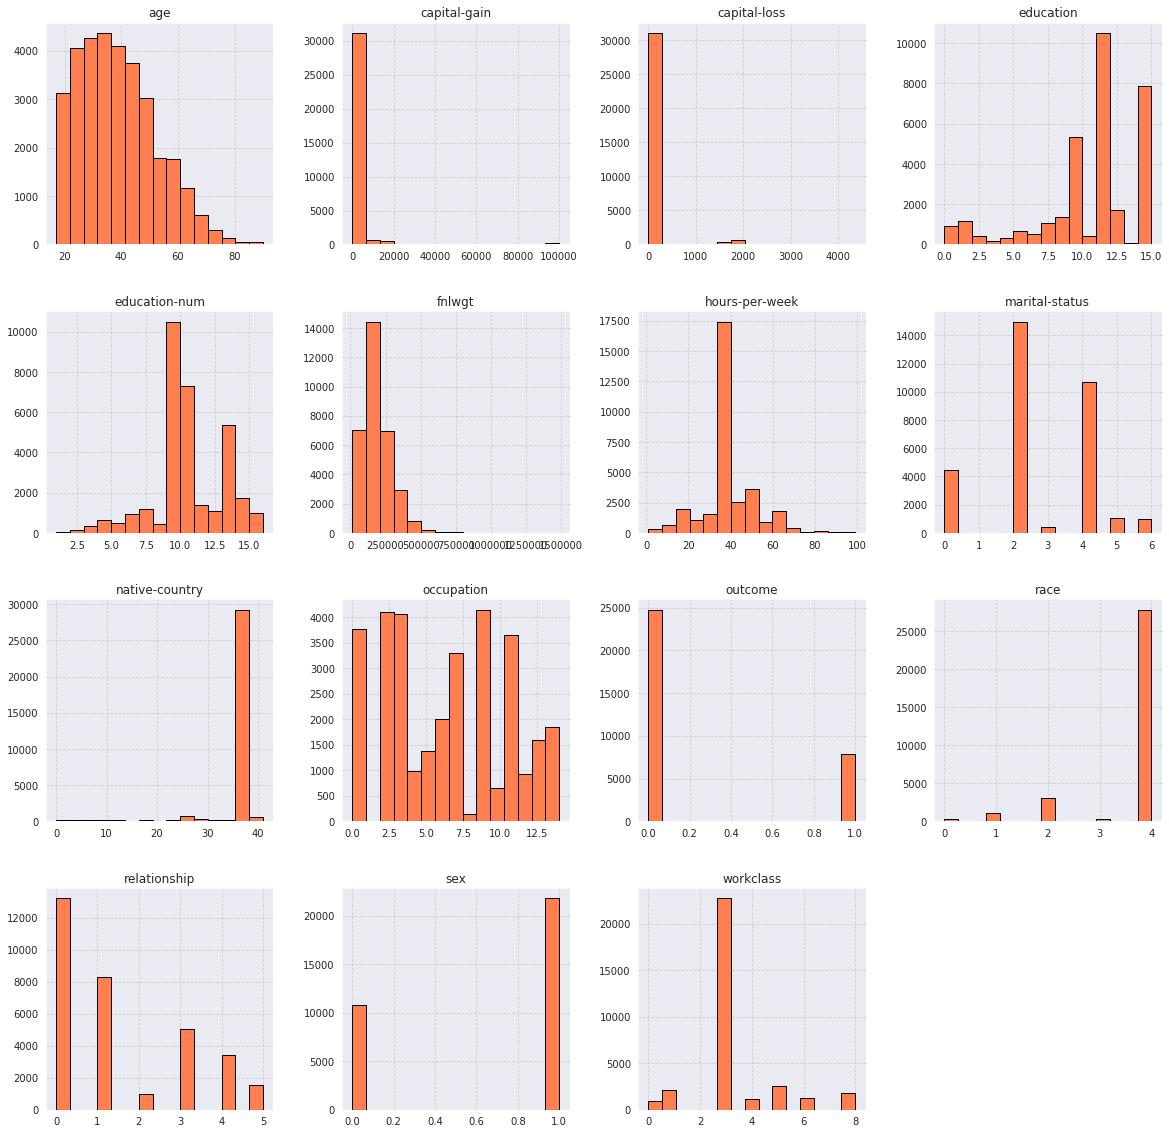

In [10]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
df.hist(figsize = (20,20),bins=15,color='#ff7f50',edgecolor="black")
plt.show()

In [11]:
# Transform native-country data in USA/not-USA

vector = [x for x in range(42)]
vector.remove(39)
df['native-country'].replace(to_replace=vector, value=0, inplace=True)
df['native-country'].replace(to_replace=39, value=1, inplace=True)

In [12]:
# Based on heatmap I created three new features

X = df.drop(columns=['outcome'])
y = df['outcome']

X['squared-education-num']= X['education-num']**2
X['squared-relationship']= X['relationship']**2
X['gain-loss'] = X['capital-gain'] - X['capital-loss']

# Data Normalization

In [13]:
columns = ['capital-gain','capital-loss','hours-per-week', 'squared-education-num', 'squared-relationship', 'age', 'gain-loss']

scaler = pp.MinMaxScaler()
X[columns] = scaler.fit_transform(X[columns])

In [14]:
X.head(200)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,squared-education-num,squared-relationship,gain-loss
0,0.301370,6,77516,9,13,4,0,1,4,1,0.021740,0.0,0.397959,0,0.658824,0.04,0.062575
1,0.452055,5,83311,9,13,2,3,0,4,1,0.000000,0.0,0.122449,0,0.658824,0.00,0.041742
2,0.287671,3,215646,11,9,0,5,1,4,1,0.000000,0.0,0.397959,0,0.313725,0.04,0.041742
3,0.493151,3,234721,1,7,2,5,0,2,1,0.000000,0.0,0.397959,0,0.188235,0.00,0.041742
4,0.150685,3,338409,9,13,2,9,5,2,0,0.000000,0.0,0.397959,0,0.658824,1.00,0.041742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.082192,3,197387,4,3,2,13,2,4,1,0.000000,0.0,0.397959,0,0.031373,0.16,0.041742
196,0.260274,3,99374,15,10,0,2,1,4,1,0.000000,0.0,0.397959,0,0.388235,0.04,0.041742
197,0.315068,0,56795,12,14,4,3,1,4,0,0.140841,0.0,0.551020,0,0.764706,0.04,0.176705
198,0.246575,3,138992,12,14,2,9,2,4,1,0.072981,0.0,0.397959,0,0.764706,0.16,0.111676


# Balancing the dataset

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=145)

In [16]:
over_sampler = RandomOverSampler(random_state=100)
X_train, y_train = over_sampler.fit_resample(X_train, y_train)

# Using GridSearch

In [17]:
# parametersDict = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [5, 10, 15, 20, 25],
#     'n_estimators': [100, 150, 200, 250],
#     'min_samples_leaf': range(2, 10),
#     'min_samples_split': range(2, 10)
# }

# clf = GridSearchCV(
#       treeClf,
#       param_grid = parametersDict,
#       cv = 5,
#       verbose = 1,
#       n_jobs = -1
# )

# clf.fit(X_train, y_train)

## RandomForest

In [18]:
clf = RandomForestClassifier(max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=250)
clf.fit(X_train, y_train)

f1_score = metrics.f1_score(y_test, clf.predict(X_test))
accuracy = metrics.accuracy_score(y_test, clf.predict(X_test))
precision = metrics.precision_score(y_test, clf.predict(X_test))
recall = metrics.recall_score(y_test, clf.predict(X_test))

print("F1 score: ", f1_score)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

F1 score:  0.7186713638651233
Accuracy:  0.8439419318816304
Precision:  0.6438232642019838
Recall:  0.8132118451025057
